#### Import the libraries

In [46]:
import pandas as pd  # data preprocessing
import numpy as np   # mathematical computation
import matplotlib.pyplot as plt # visualization
import seaborn as sns           # visualization 

#### Reading the dataset

In [81]:
df = pd.read_csv('h1n1_vaccine_prediction.csv')
print(type(df))
df.head()  # top 5 rows

<class 'pandas.core.frame.DataFrame'>


,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,White,Female,Below Poverty,Not Married,Own,Not in Labor Force,Non-MSA,0.0,0.0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,White,Male,Below Poverty,Not Married,Rent,Employed,"MSA, Not Principle City",0.0,0.0,0
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,White,Female,Below Poverty,Not Married,Rent,Not in Labor Force,"MSA, Principle City",0.0,0.0,0
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",1.0,0.0,0


#### Shape

In [82]:
df.shape
# rows = 26707, cols = 34

(26707, 34)

In [83]:
df1 = df.copy()
df1.shape

(26707, 34)

### Data Preprocessing

#### 1) Handling Null values

In [84]:
nv = df1.isnull().sum()
nv[nv>0]

h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
qualification                 1407
income_level                  4423
marital_status                1408
housing_status                2042
employment                    1463
no_of_adults                   249
no_of_children                 249
dtype: int64

In [85]:
df1['unique_id'].nunique()

26707

In [86]:
df1.drop('unique_id',axis=1,inplace=True)

In [87]:
nv = df1.isnull().sum()
nv = nv[nv>0]
nv

h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
qualification                 1407
income_level                  4423
marital_status                1408
housing_status                2042
employment                    1463
no_of_adults                   249
no_of_children                 249
dtype: int64

### Percent of Missing Values

In [88]:
nv_per = (nv/df.shape[0])*100
nv_df = pd.DataFrame({'Col':nv.index,'Sum_Null':nv.values,'Per_Null':nv_per.values})
nv_df.sort_values(by='Sum_Null',ascending=False)

,Col,Sum_Null,Per_Null
14,has_health_insur,12274,45.957989
22,income_level,4423,16.561201
10,dr_recc_seasonal_vacc,2160,8.087767
9,dr_recc_h1n1_vacc,2160,8.087767
24,housing_status,2042,7.645936
25,employment,1463,5.477965
23,marital_status,1408,5.272026
21,qualification,1407,5.268282
11,chronic_medic_condition,971,3.635751
12,cont_child_undr_6_mnths,820,3.070356


In [90]:
df2 = df1.copy()

### Approach - 1
Dropping columns with large number of null values and dropping rows containing few null values.

In [91]:
df1.drop(['has_health_insur','income_level','dr_recc_seasonal_vacc','dr_recc_h1n1_vacc',
          'housing_status'],inplace=True,axis=1)
print(df1.columns)

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'chronic_medic_condition',
       'cont_child_undr_6_mnths', 'is_health_worker', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'age_bracket', 'qualification',
       'race', 'sex', 'marital_status', 'employment', 'census_msa',
       'no_of_adults', 'no_of_children', 'h1n1_vaccine'],
      dtype='object')


In [93]:
df1.shape

(26707, 28)

In [94]:
df1.isnull().sum()

h1n1_worry                     92
h1n1_awareness                116
antiviral_medication           71
contact_avoidance             208
bought_face_mask               19
wash_hands_frequently          42
avoid_large_gatherings         87
reduced_outside_home_cont      82
avoid_touch_face              128
chronic_medic_condition       971
cont_child_undr_6_mnths       820
is_health_worker              804
is_h1n1_vacc_effective        391
is_h1n1_risky                 388
sick_from_h1n1_vacc           395
is_seas_vacc_effective        462
is_seas_risky                 514
sick_from_seas_vacc           537
age_bracket                     0
qualification                1407
race                            0
sex                             0
marital_status               1408
employment                   1463
census_msa                      0
no_of_adults                  249
no_of_children                249
h1n1_vaccine                    0
dtype: int64

#### Dropping remaining rows conatining with null values

In [95]:
df1.dropna(inplace=True)
print(df1.shape)

(24002, 28)


#### Percentage data loss

In [96]:
per_data_loss = (26707 - df1.shape[0])/26707
print(per_data_loss)

0.10128430748492905


In [97]:
nv = df1.isnull().sum()
nv[nv>0]

Series([], dtype: int64)

#### Handle duplicates

In [98]:
df1.duplicated().sum()

22

In [99]:
df1.drop_duplicates(inplace=True)
df1.duplicated().sum()
df1.shape

(23980, 28)

## EDA

### Univariate Data Analysis

In [102]:
df1['h1n1_vaccine'].value_counts()

0    18828
1     5152
Name: h1n1_vaccine, dtype: int64

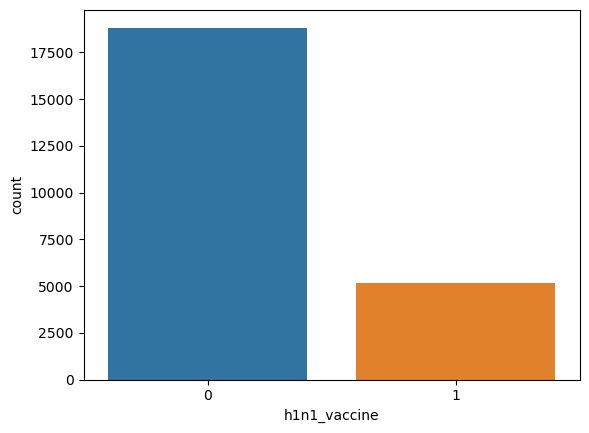

In [101]:
sns.countplot(x=df1['h1n1_vaccine'])
plt.show()

In [105]:
num_cols = df1.dtypes[df1.dtypes!='object'].index
print(num_cols)

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'chronic_medic_condition',
       'cont_child_undr_6_mnths', 'is_health_worker', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children', 'h1n1_vaccine'],
      dtype='object')


In [106]:
for i in num_cols:
    print(f'Feature Name : {i}')
    print(df1[i].value_counts())
    print('*'*20)

Feature Name : h1n1_worry
2.0    9667
1.0    7415
3.0    4045
0.0    2853
Name: h1n1_worry, dtype: int64
********************
Feature Name : h1n1_awareness
1.0    13246
2.0     8750
0.0     1984
Name: h1n1_awareness, dtype: int64
********************
Feature Name : antiviral_medication
0.0    22837
1.0     1143
Name: antiviral_medication, dtype: int64
********************
Feature Name : contact_avoidance
1.0    17598
0.0     6382
Name: contact_avoidance, dtype: int64
********************
Feature Name : bought_face_mask
0.0    22355
1.0     1625
Name: bought_face_mask, dtype: int64
********************
Feature Name : wash_hands_frequently
1.0    19909
0.0     4071
Name: wash_hands_frequently, dtype: int64
********************
Feature Name : avoid_large_gatherings
0.0    15398
1.0     8582
Name: avoid_large_gatherings, dtype: int64
********************
Feature Name : reduced_outside_home_cont
0.0    15934
1.0     8046
Name: reduced_outside_home_cont, dtype: int64
********************
Fea

### Inference
All features which are not object are categorical with float or int data types. 

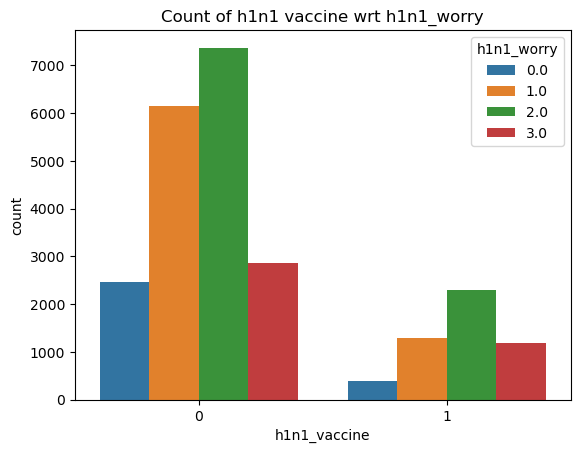

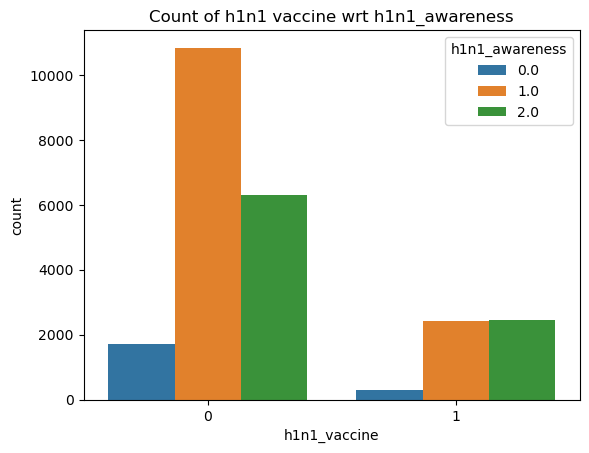

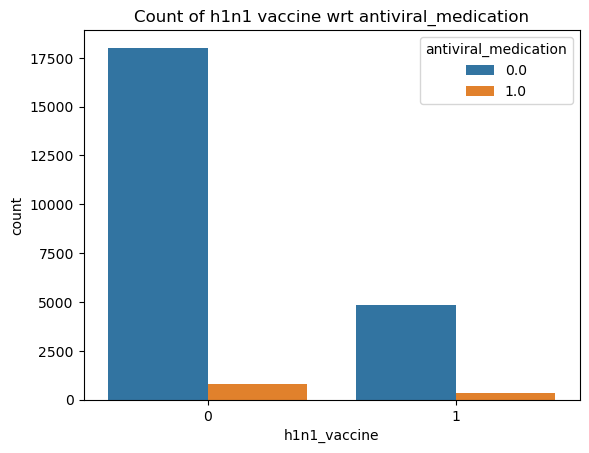

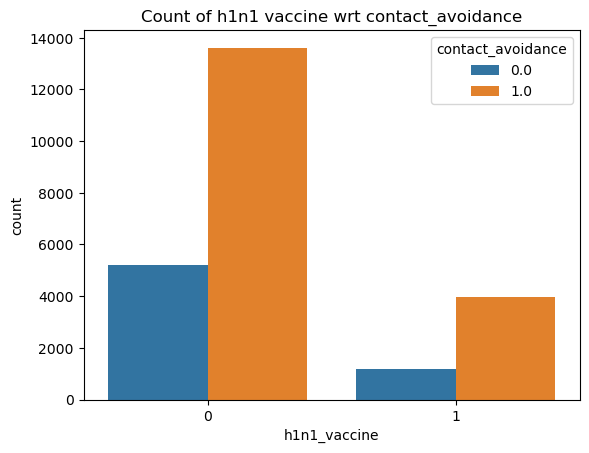

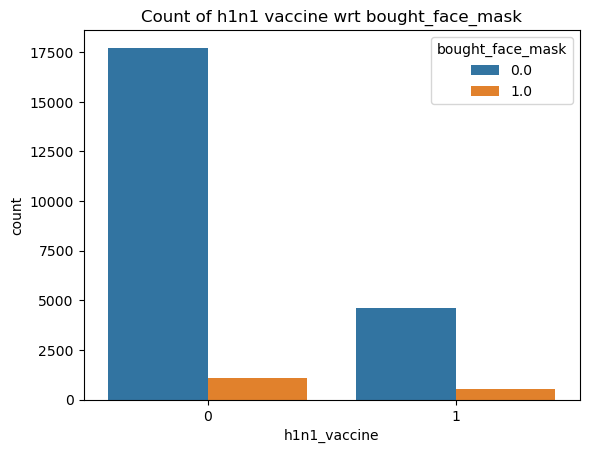

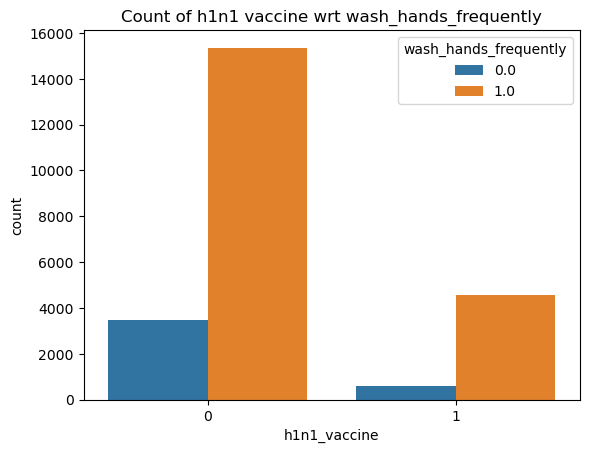

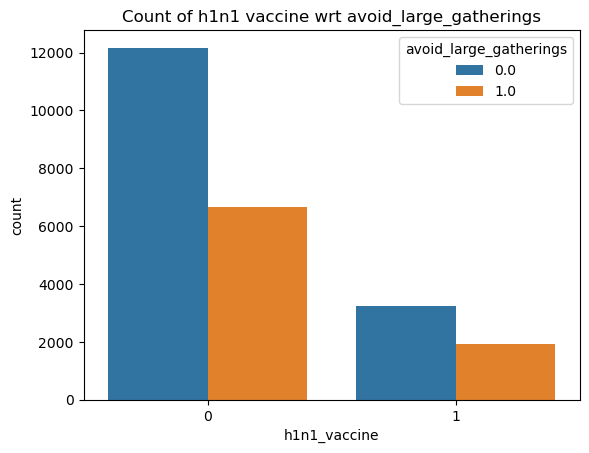

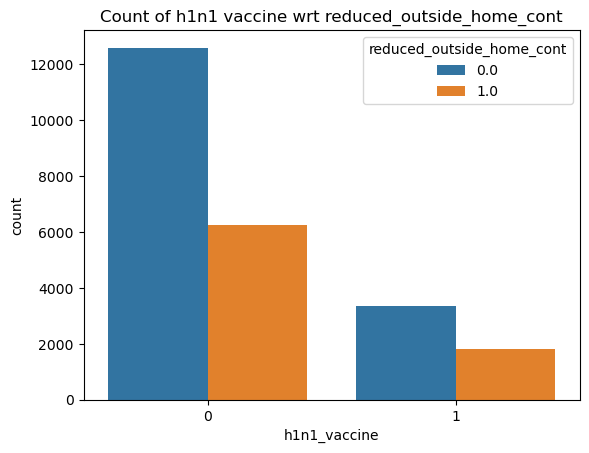

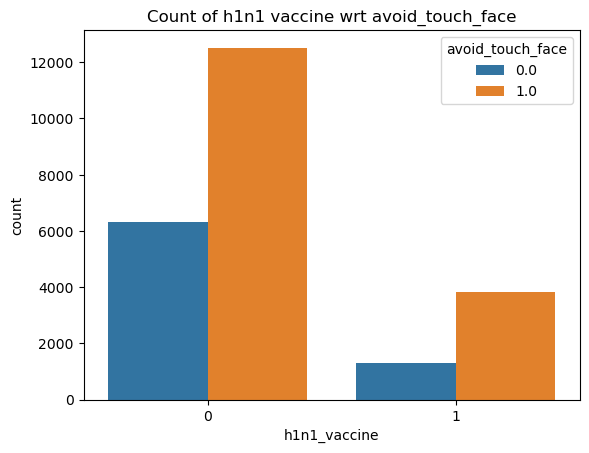

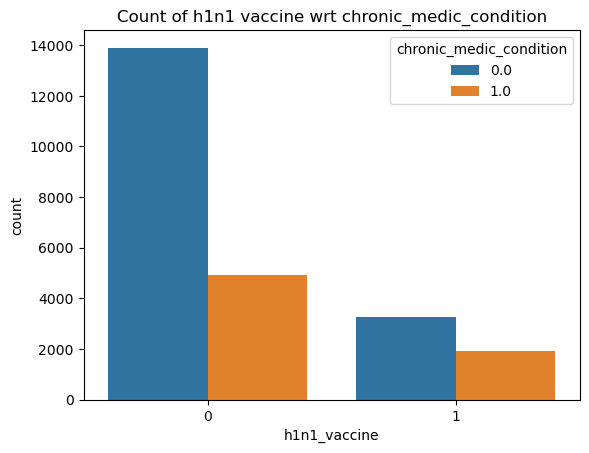

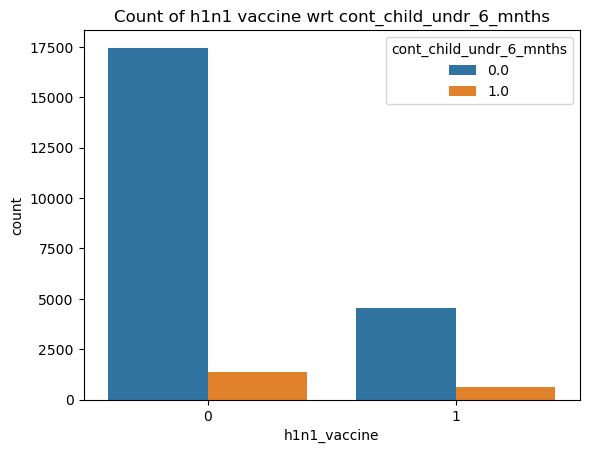

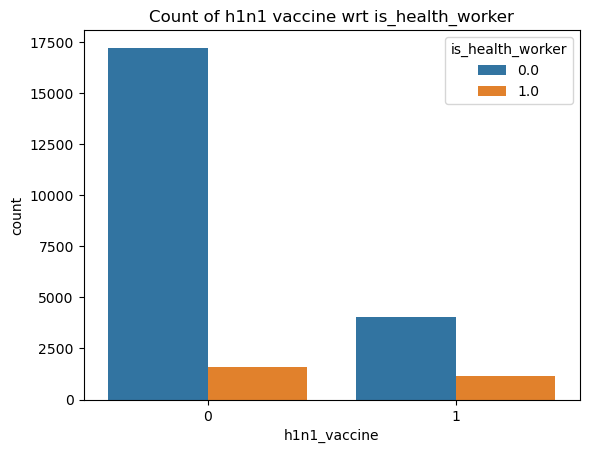

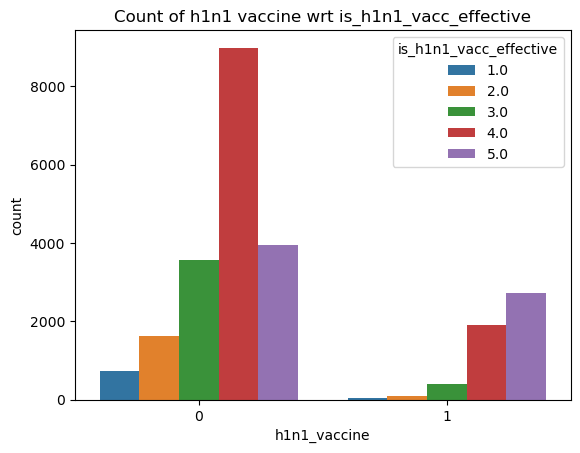

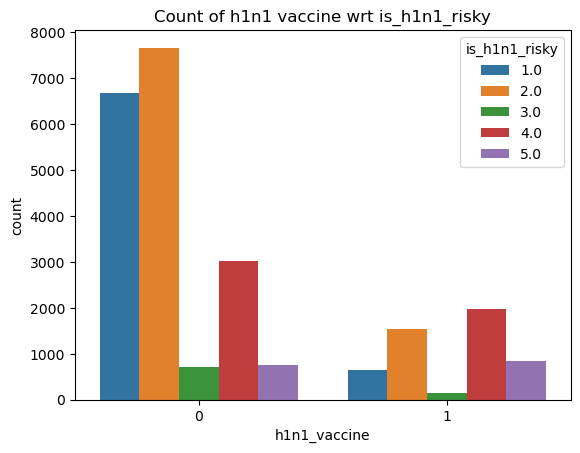

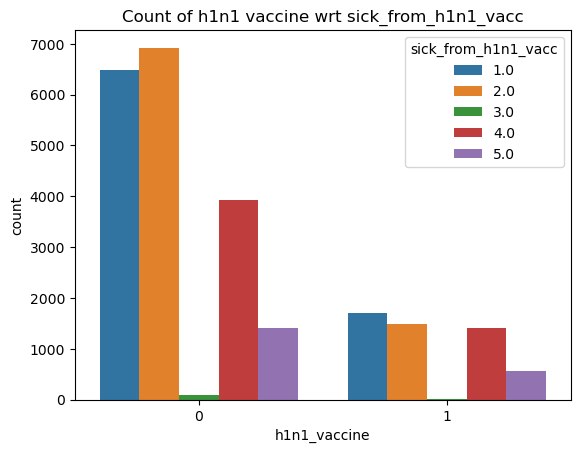

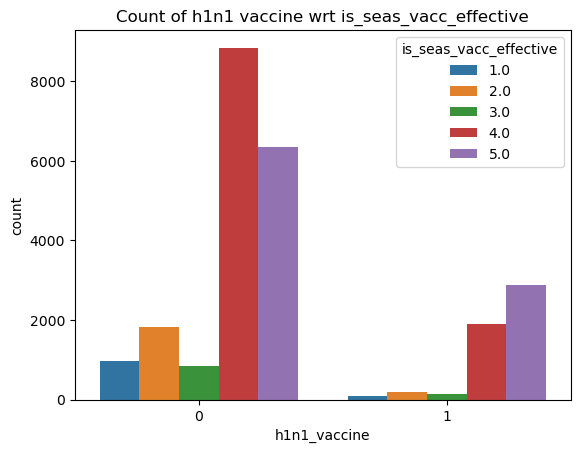

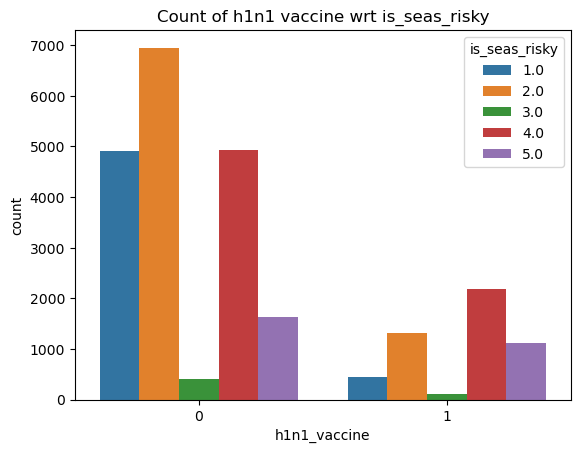

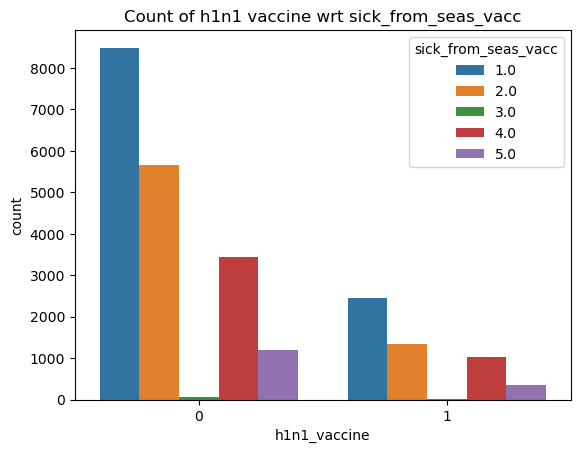

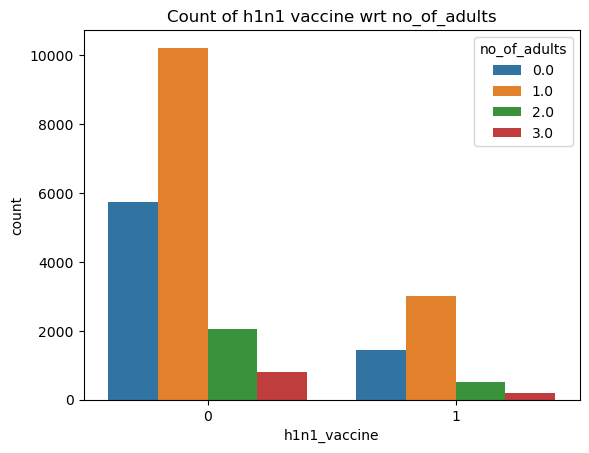

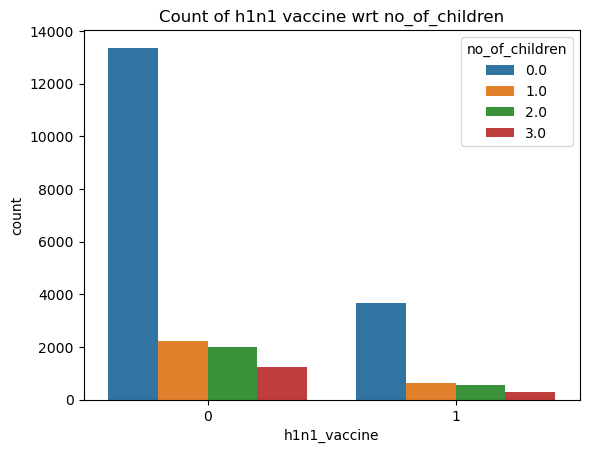

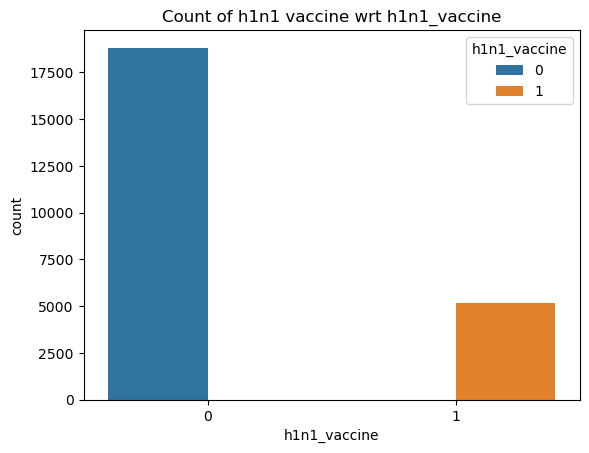

In [107]:
for i in num_cols:
    sns.countplot(x=df1['h1n1_vaccine'],hue=df1[i])
    plt.title(f'Count of h1n1 vaccine wrt {i}')
    plt.show()

#### Inference
1) IDs of worried have mostly not received H1N1 vaccination.<br>
2) IDs having little and good knowledge received H1N1 vaccination comared to Popultaion having no knowledge.<br>
3) Majority IDs who have taken antiviral medication have not received H1N1 vaccination.<br>
4) Majority of those who followed Contact avoidance have not received H1N1 vaccination.<br>
5) Majority of those who dont have chronic medical condition have not received H1N1 vaccination.
...

In [112]:
cat_cols = df1.dtypes[df.dtypes=='object'].index
print(cat_cols)

Index(['age_bracket', 'qualification', 'race', 'sex', 'marital_status',
       'employment', 'census_msa'],
      dtype='object')


In [113]:
for i in cat_cols:
    print(f'Feature Name : {i}')
    print(df1[i].value_counts())
    print('*'*20)

Feature Name : age_bracket
65+ Years        6044
55 - 64 Years    5111
45 - 54 Years    4753
18 - 34 Years    4662
35 - 44 Years    3410
Name: age_bracket, dtype: int64
********************
Feature Name : qualification
College Graduate    9626
Some College        6708
12 Years            5461
< 12 Years          2185
Name: qualification, dtype: int64
********************
Feature Name : race
White                19153
Black                 1876
Hispanic              1557
Other or Multiple     1394
Name: race, dtype: int64
********************
Feature Name : sex
Female    14351
Male       9629
Name: sex, dtype: int64
********************
Feature Name : marital_status
Married        12927
Not Married    11053
Name: marital_status, dtype: int64
********************
Feature Name : employment
Employed              12998
Not in Labor Force     9587
Unemployed             1395
Name: employment, dtype: int64
********************
Feature Name : census_msa
MSA, Not Principle  City    10468
MSA, P

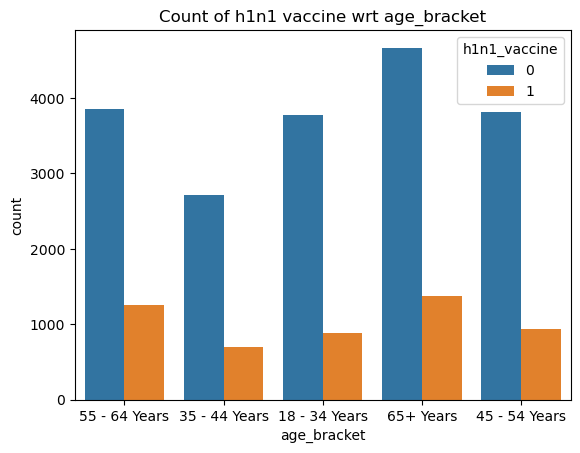

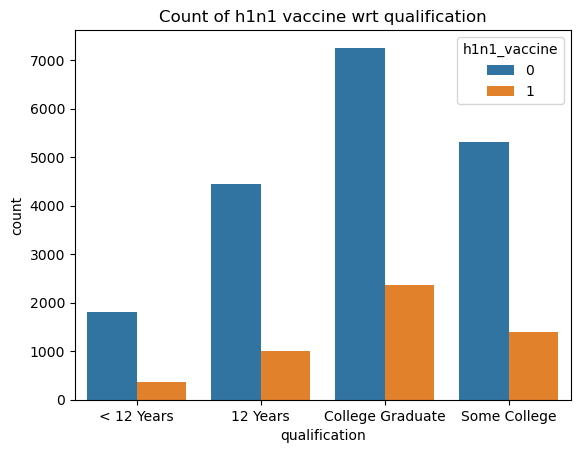

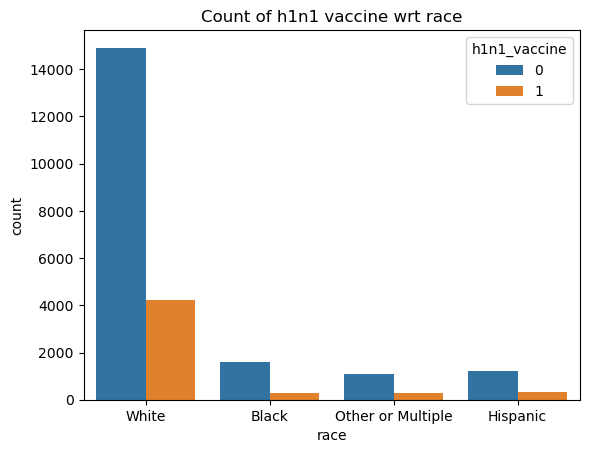

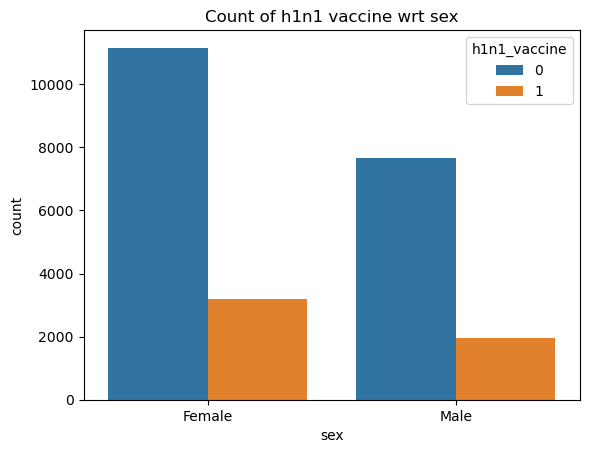

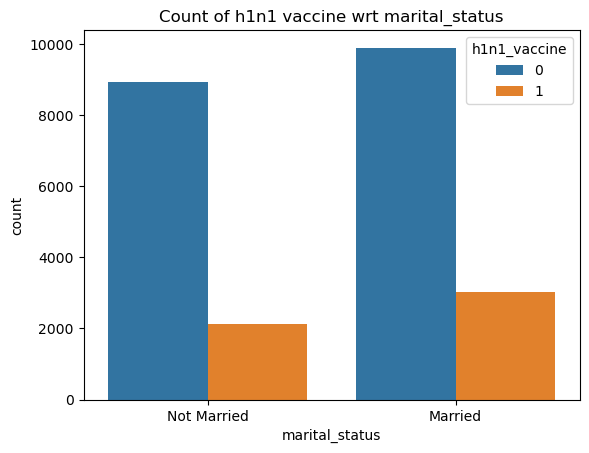

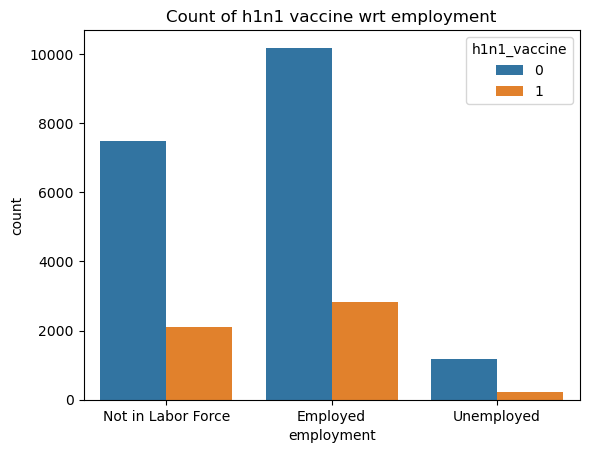

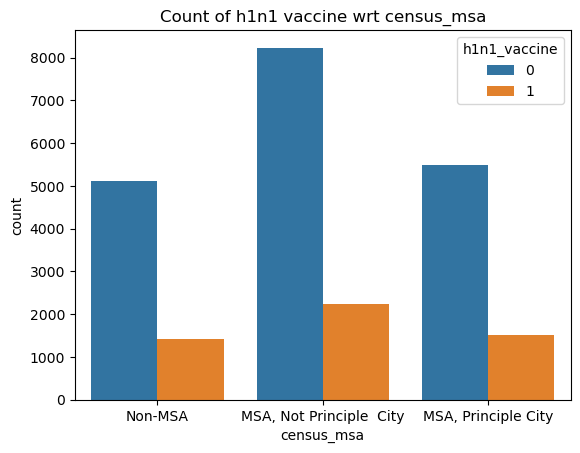

In [118]:
for i in cat_cols:
    sns.countplot(x=df1[i], hue=df1['h1n1_vaccine'])
    plt.title(f'Count of h1n1 vaccine wrt {i}')
    plt.show()

#### Inference
1) 65+ and 55-64 yrs aged IDs have recived most h1n1 vaccination.<br>
2) College Grads and some collge have recived most h1n1 vaccination<br>
3) Most Ids with White race  have recived vaccination<br>
4) More feamles are vaccinated compared to males<br>
5) More married IDs are vaccinated <br>
6) More Ids for Employed and not in labor Force are vaccinated compated to Unemployed<br>
...

### Correlation

In [123]:
corr = df1.corr()

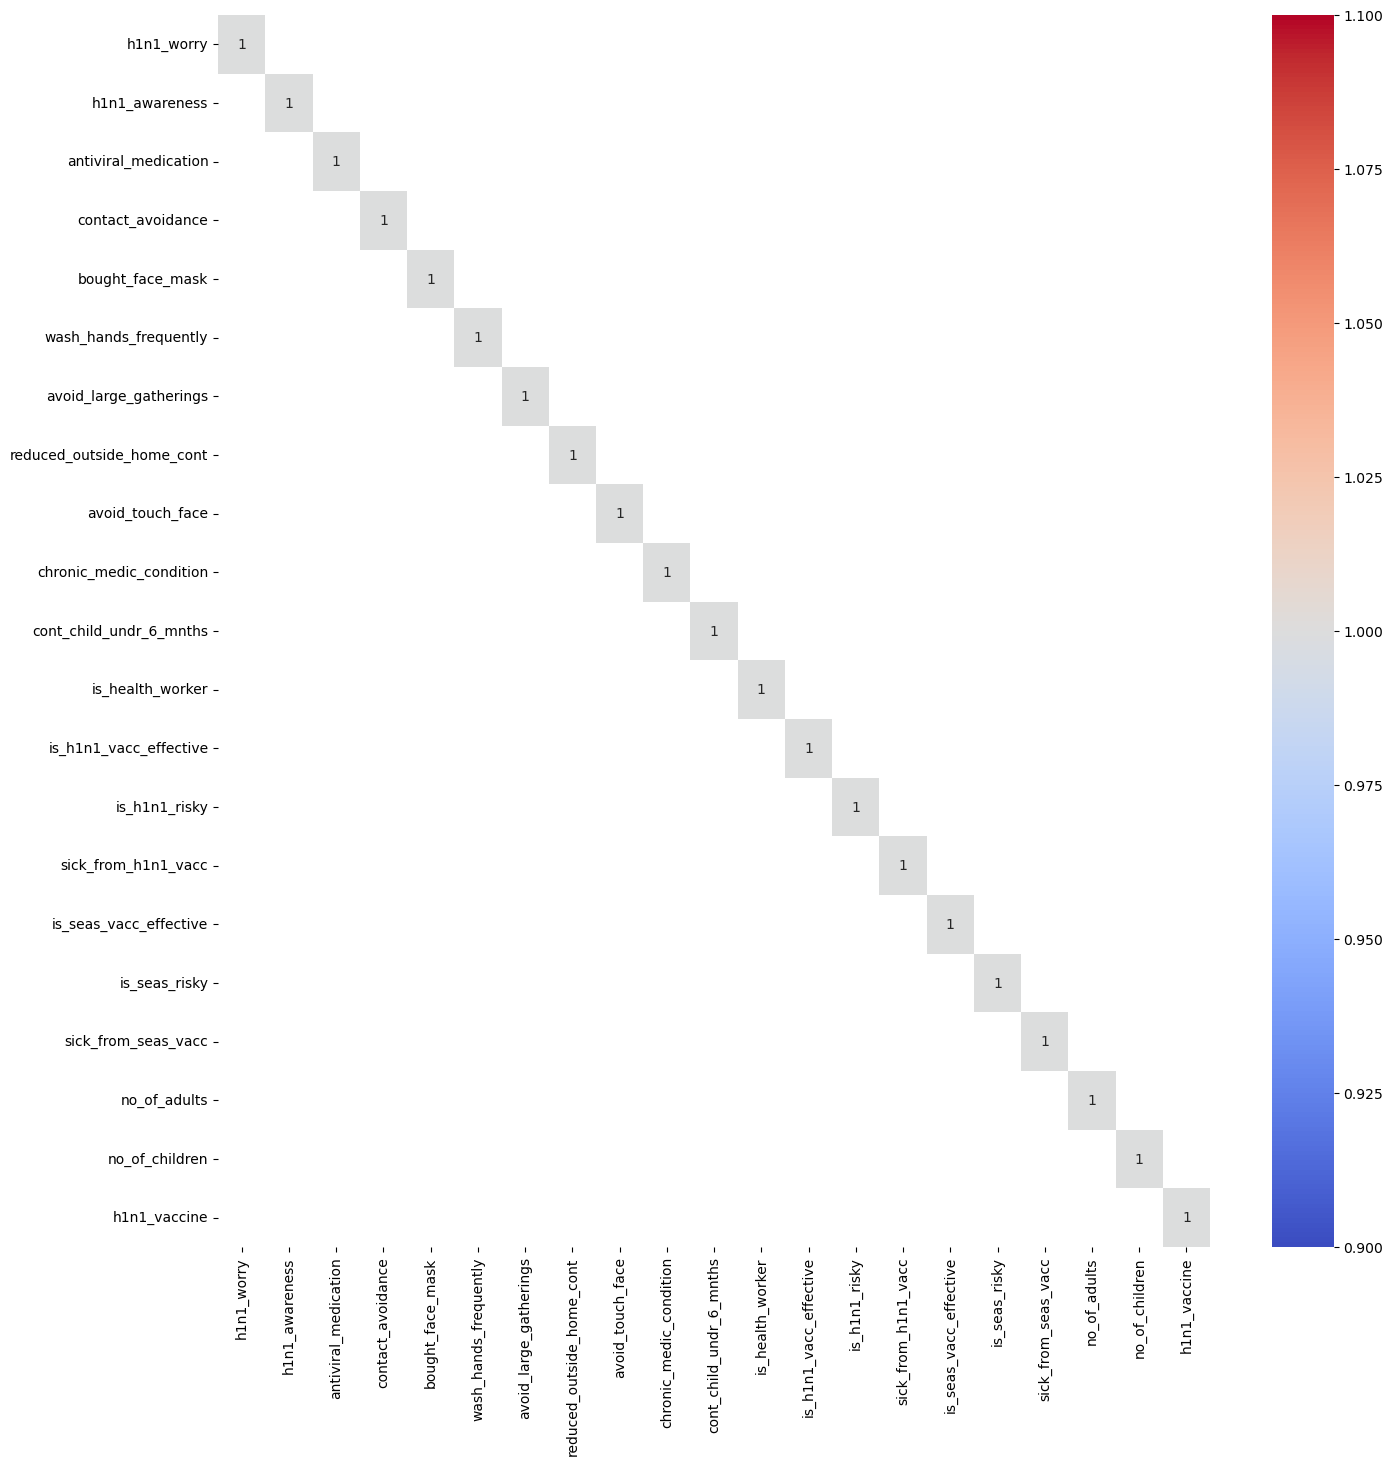

In [124]:
plt.figure(figsize=(16,16))
sns.heatmap(corr[corr>0.7],annot=True,cmap='coolwarm')
plt.show()

### Inferecne
1) Featrues are not highly correlated.

### Check the data types

In [119]:
df1.dtypes

h1n1_worry                   float64
h1n1_awareness               float64
antiviral_medication         float64
contact_avoidance            float64
bought_face_mask             float64
wash_hands_frequently        float64
avoid_large_gatherings       float64
reduced_outside_home_cont    float64
avoid_touch_face             float64
chronic_medic_condition      float64
cont_child_undr_6_mnths      float64
is_health_worker             float64
is_h1n1_vacc_effective       float64
is_h1n1_risky                float64
sick_from_h1n1_vacc          float64
is_seas_vacc_effective       float64
is_seas_risky                float64
sick_from_seas_vacc          float64
age_bracket                   object
qualification                 object
race                          object
sex                           object
marital_status                object
employment                    object
census_msa                    object
no_of_adults                 float64
no_of_children               float64
h

In [121]:
# df1a = df1.copy()
# print(df1.shape)
# print(df1a.shape)

(23980, 28)
(23980, 28)


#### Generate dummies

In [125]:
df1_dummies = pd.get_dummies(df1,drop_first=True)
print(df1_dummies.shape)

(23980, 37)


In [126]:
print(df1_dummies.columns)

Index(['h1n1_worry', 'h1n1_awareness', 'antiviral_medication',
       'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently',
       'avoid_large_gatherings', 'reduced_outside_home_cont',
       'avoid_touch_face', 'chronic_medic_condition',
       'cont_child_undr_6_mnths', 'is_health_worker', 'is_h1n1_vacc_effective',
       'is_h1n1_risky', 'sick_from_h1n1_vacc', 'is_seas_vacc_effective',
       'is_seas_risky', 'sick_from_seas_vacc', 'no_of_adults',
       'no_of_children', 'h1n1_vaccine', 'age_bracket_35 - 44 Years',
       'age_bracket_45 - 54 Years', 'age_bracket_55 - 64 Years',
       'age_bracket_65+ Years', 'qualification_< 12 Years',
       'qualification_College Graduate', 'qualification_Some College',
       'race_Hispanic', 'race_Other or Multiple', 'race_White', 'sex_Male',
       'marital_status_Not Married', 'employment_Not in Labor Force',
       'employment_Unemployed', 'census_msa_MSA, Principle City',
       'census_msa_Non-MSA'],
      dtype='object')


In [128]:
df1_dummies['h1n1_vaccine']

0        0
1        0
2        0
3        0
4        0
        ..
26700    0
26701    0
26702    0
26703    0
26706    0
Name: h1n1_vaccine, Length: 23980, dtype: int64

#### Select dependent and Independent Features

In [140]:
x = df1_dummies.drop('h1n1_vaccine',axis=1)
y = df1_dummies['h1n1_vaccine']
print(x.shape)
print(y.shape)

(23980, 36)
(23980,)


In [135]:
set(y)

{0, 1}

In [141]:
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import roc_auc_score,f1_score,accuracy_score,precision_score,recall_score

In [159]:
def eval_model(ytest,ypred):
    cm = confusion_matrix(y_test,ypred)
    print('Confusion Matrix\n',cm)
    print(classification_report(y_test,ypred))

### 1) Using Statsmodel

In [132]:
# import statsmodels.api as sm  

In [143]:
# x = sm.add_constant(x)
# log_reg_model = sm.Logit(y,x).fit()
# log_reg_model.summary()

In [144]:
# ypred_log_reg = log_reg_model.predict(x)
# print(ypred_log_reg)

### Split the data into train and test

In [146]:
from sklearn.model_selection import train_test_split # for data splitting

In [147]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(16786, 36)
(7194, 36)
(16786,)
(7194,)


### Build the model

In [148]:
from sklearn.linear_model import LogisticRegression

In [154]:
lr1 = LogisticRegression(max_iter=10000)
lr1.fit(x_train,y_train)

LogisticRegression(max_iter=10000)

In [155]:
print('Train Score',lr1.score(x_train,y_train))
print('Test Score',lr1.score(x_test,y_test))

Train Score 0.8169903491004409
Test Score 0.8087294968028913


In [160]:
ypred_lr1 = lr1.predict(x_test)
eval_model(y_test,ypred_lr1)

Confusion Matrix
 [[5343  266]
 [1110  475]]
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      5609
           1       0.64      0.30      0.41      1585

    accuracy                           0.81      7194
   macro avg       0.73      0.63      0.65      7194
weighted avg       0.79      0.81      0.78      7194



In [163]:
print(precision_score(y_test,ypred_lr1,pos_label=0))
print(precision_score(y_test,ypred_lr1,pos_label=1))
print(recall_score(y_test,ypred_lr1,pos_label=0))
print(recall_score(y_test,ypred_lr1,pos_label=1))

0.8279869827986983
0.6410256410256411
0.9525762167944375
0.2996845425867508


In [205]:
ypred_lr1_proba = lr1.predict_proba(x_test)
print(ypred_lr1_proba[:10])

[[0.76751673 0.23248327]
 [0.36901981 0.63098019]
 [0.85262865 0.14737135]
 [0.48173207 0.51826793]
 [0.88222211 0.11777789]
 [0.48599486 0.51400514]
 [0.82844566 0.17155434]
 [0.87590425 0.12409575]
 [0.8600902  0.1399098 ]
 [0.94216976 0.05783024]]


### ROC_AUC Curve

In [233]:
from sklearn.metrics import roc_curve,roc_auc_score

In [238]:
def plot_roc_auc(model,ytest,ypred_proba):
    fpr,tpr,thresh = roc_curve(ytest,ypred_proba[:,1])
    auc = roc_auc_score(ytest,ypred_proba[:,1])
    print('AUC',auc)
    plt.plot(fpr,tpr)
#     plt.xlim([0.0,1.0])
#     plt.ylim([0.0,1.0])
    plt.plot([0,1],[0,1],label='TPR=FPR',color='red')
    plt.xlabel('FPR',fontsize=15)
    plt.ylabel('TPR',fontsize=15)
    plt.title('ROC Curve',fontsize=16)
    plt.legend()
    plt.show()
    return fpr,tpr,thresh

AUC 0.7885410614869186


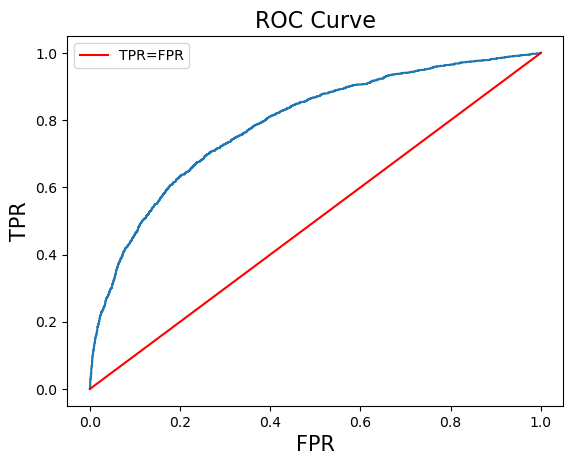

In [239]:
fpr_lr1,tpr_lr1,thresh_lr1 = plot_roc_auc(lr1,y_test,ypred_lr1_proba)

In [232]:
print(len(thresh_lr1))
print(thresh_lr1)

1968
[1.90893906 0.90893906 0.90799656 ... 0.00392325 0.00285053 0.00208689]


#### Best Threshold

In [244]:
best_thresh_idx = np.argmax(tpr_lr1*(1-fpr_lr1))
print(thresh_lr1[best_thresh_idx])

0.21928087361053838


In [ ]:
r1 = ['Y','N','Y','N','Y','N','Y','N','Y']
r2 = ['Y','Y','Y','N','N','N','Y','Y','Y']

### Cohen Kappa Score
1) Cohen’s Kappa is a statistical measure that is used to measure the reliability of two raters who are rating the same quantity and identifies how frequently the raters are in agreement. 
2) Example<br>
<pre>
r1 = ['Y','N','Y','N','Y','N','Y','N','Y','N]
r2 = ['Y','Y','Y','N','N','N','Y','Y','Y','N]
r1 and r2 are observations by rate1 and rater2

       R2_Y   R2_N
R1_Y    4     1
R1_N    2     3

Agreement= sum of agreements / total number of instances
Agreement = (4+3)/10 = 0.7

Cases where raters are not in agreement
p(yes)= ((4+1)/10)*((4+2)/10)=0.3
p(no)=((2+2)/10)*((2+1)/10)=0.12

Total non disagreement= 0.30+0.12= 0.42

Kappa = 1 - ((1-0.7)/(1-0.12)  = 0.65909

The Kappa statistic varies from 0 to 1, where.

    0 = agreement equivalent to chance.
    0.1 – 0.20 = slight agreement.
    0.21 – 0.40 = fair agreement.
    0.41 – 0.60 = moderate agreement.
    0.61 – 0.80 = substantial agreement.
    0.81 – 0.99 = near perfect agreement
    1 = perfect agreement.

</pre>

In [247]:
r1 = ['Y','N','Y','N','Y','N','Y','N','Y','N']
r2 = ['Y','Y','Y','N','N','N','Y','Y','Y','N']
res = confusion_matrix(r1,r2)
res

array([[3, 2],
       [1, 4]], dtype=int64)

In [252]:
print(((4+1)/10)*((4+2)/10))
print(((2+2)/10)*((2+1)/10))
Kappa = 1 - ((1-0.7)/(1-0.12))
print(Kappa) 

0.3
0.12
0.6590909090909091


In [241]:
from sklearn.metrics import cohen_kappa_score

In [242]:
kappa = cohen_kappa_score(y_test,ypred_lr1)
print('Kappa Score',kappa)

Kappa Score 0.3118217853747781


#### Inference
There is fair agreement between actual and predicted values

### 3) Using SGDClassifier

In [165]:
from sklearn.linear_model import SGDClassifier

In [190]:
sgd1 = SGDClassifier(max_iter=1000,eta0=0.001,loss='log')
sgd1.fit(x_train,y_train)

SGDClassifier(eta0=0.001, loss='log')

In [191]:
print('Training score',sgd1.score(x_train,y_train))
print('Testing score',sgd1.score(x_test,y_test))

Training score 0.8100798284284523
Testing score 0.804837364470392


In [192]:
ypred_sgd1 = sgd1.predict(x_test)
eval_model(y_test,ypred_sgd1)

Confusion Matrix
 [[5507  102]
 [1302  283]]
              precision    recall  f1-score   support

           0       0.81      0.98      0.89      5609
           1       0.74      0.18      0.29      1585

    accuracy                           0.80      7194
   macro avg       0.77      0.58      0.59      7194
weighted avg       0.79      0.80      0.75      7194

